<a href="https://colab.research.google.com/github/Abdelhamid-Khaled/Diamond/blob/main/Diamonds_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. 

### Content

**price** price in US dollars (\\$326--\\$18,823)

**carat** weight of the diamond (0.2--5.01)

**cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color** diamond colour, from J (worst) to D (best)

**clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x** length in mm (0--10.74)

**y** width in mm (0--58.9)

**z** depth in mm (0--31.8)

**depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table** width of top of diamond relative to widest point (43--95)



In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loding the csv file as pandas dataframe
diamonds = pd.read_csv('/content/diamonds.csv')

In [3]:
# Looking at the loaded data
diamonds.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [5]:
# dropping the first column
diamonds = diamonds.drop(diamonds.columns[0],1)
# code to directly delete first column, while loding the data from csv file
# diamonds = pd.read_csv('G:\My Research\CSV Files\diamonds.csv').iloc[:,1:]

In [6]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
# checking the datatypes and null values in the data
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


**From the above, we can see that there are no null values in our dataset.**

In [ ]:
# if there are null values presents in the data, then we can use imputer for filling those null values
# from sklearn.preprocessing import Imputer

In [8]:
# checking for the unique values and their total counts in the dataset, 
# to get an insight about categorical and numerical variables in the dataset
for i in diamonds:
    print(diamonds[i].value_counts())

0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
3.02       1
3.65       1
3.50       1
3.22       1
3.11       1
Name: carat, Length: 273, dtype: int64
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64
62.0    2239
61.9    2163
61.8    2077
62.2    2039
62.1    2020
        ... 
71.3       1
44.0       1
53.0       1
53.1       1
54.7       1
Name: depth, Length: 184, dtype: int64
56.0    9881
57.0    9724
58.0    8369
59.0    6572
55.0    6268
        ... 
51.6       1
63.5       1
43.0       1
62.4       1
61.6       1
Name: table, Length: 127, dtype: int64
605      132
802      127
625      126
828      125
776      124
        ... 
8816       1
1

In [ ]:
# defining the variables into Categorical and Numerical

**Categorical Variables :** cut, color, clarity
**Numerical Variables :** carat, depth, table, price, x, y, z

In [ ]:
# defining the variables into Dependent and Independent

**Dependent Variable :** price
**Independent Variable :** carat, cut, color, clarity, depth, table, x, y, z

In [9]:
# Now we will see the distribution of variables
d_cat = diamonds[['cut', 'color', 'clarity']]
d_num = diamonds[[ 'carat','depth', 'table', 'price', 'x', 'y', 'z']]

In [10]:
d_num.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


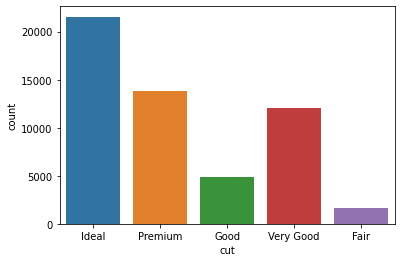

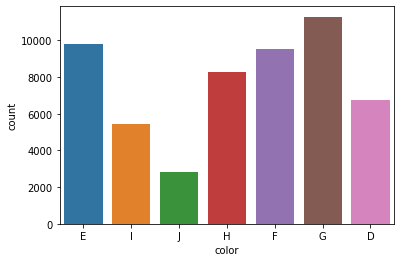

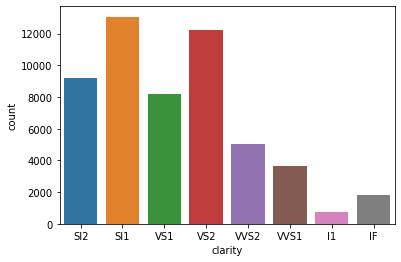

In [11]:
for i in d_cat:
    sns.countplot(x=i, data=d_cat)
    plt.show()

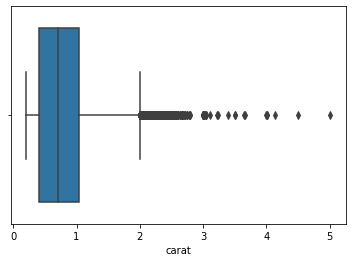

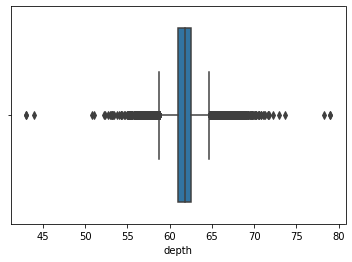

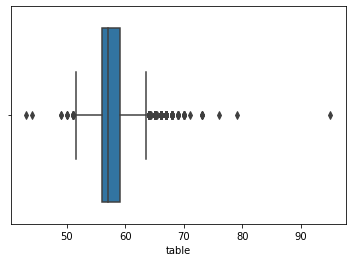

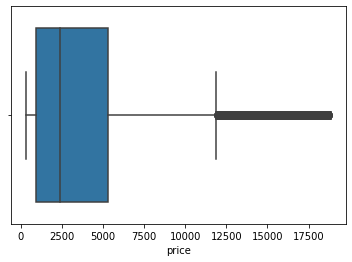

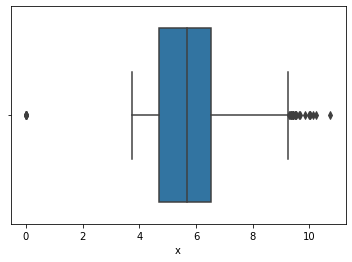

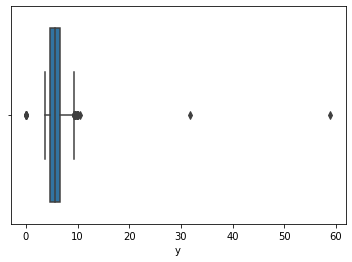

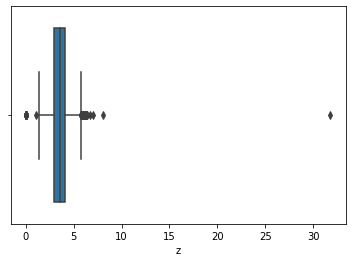

In [12]:
for i in d_num:
    sns.boxplot(x=i, data=d_num)
    plt.show()

From the above graph we can see that there are many outliers present in our data, thus outlier treatment is necessary,
but here, the target variable is Price and as we are predicting price of diamonds, then extreme values are possible, depending about the dimentions of the diamonds.

In [19]:
diamonds.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [21]:
# encoding categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
diamonds['cut'] = le.fit_transform(diamonds['cut'])
diamonds['color'] = le.fit_transform(diamonds['color'])
diamonds['clarity'] = le.fit_transform(diamonds['clarity'])

In [22]:
diamonds.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

**Splitting the data into train and test**

In [24]:
# Splitting the data into dependent and independent variables
X=diamonds.drop('price', 1)
y=diamonds['price']
    
# Splitting into test and train data (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print('X_train size :',X_train.shape)
print('X_test size :',X_test.shape)
print('y_train size :',y_train.shape)
print('y_test size :',y_test.shape)

X_train size : (37758, 9)
X_test size : (16182, 9)
y_train size : (37758,)
y_test size : (16182,)


**Feature Scaling** To scale the independent features so that all the values can be in a comparable range

In [29]:
X_train.describe()

,carat,cut,color,clarity,depth,table,x,y,z
count,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.00000
mean,0.798215,2.556862,2.591663,3.837094,61.741901,57.454974,5.729500,5.733609,3.53770
std,0.477678,1.024961,1.701094,1.722390,1.433101,2.232344,1.128579,1.160468,0.71396
min,0.200000,0.000000,0.000000,0.000000,43.000000,44.000000,0.000000,0.000000,0.00000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,4.710000,4.720000,2.91000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,5.690000,5.700000,3.52000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,6.540000,6.540000,4.04000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,10.740000,58.900000,31.80000


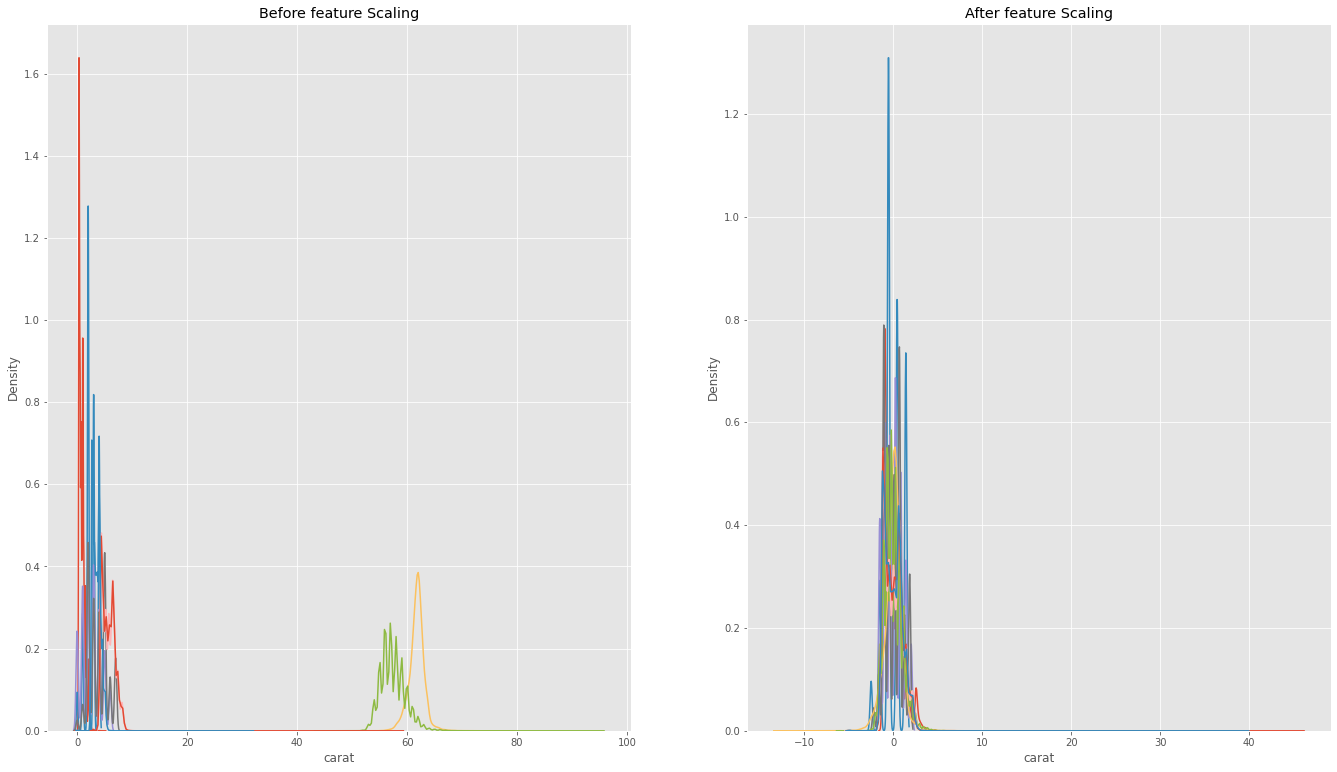

In [30]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
    
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X_train)
scaled_df = pd.DataFrame(scaled_df, columns=X_train.columns)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(23,13))

ax1.set_title('Before feature Scaling')
for i in X_train:
        sns.kdeplot(X_train[i], ax=ax1)
                    
ax2.set_title('After feature Scaling')
for i in scaled_df:
    sns.kdeplot(scaled_df[i], ax=ax2)
    
plt.show()

**Now we can see that the values of all independent variables lie in a comparable range**

**Now our data is ready to fit into regression model**

In [35]:
# defining a function for regression model

# building and training the model with train data, using sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(f'R^2 score for Train using sklearn: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for Test using sklearn: {lin_reg.score(X_test, y_test)}')


    
    
# Value of MAE and RMSE
from sklearn import metrics
y_pred_test = model.predict(sm.add_constant(X_test))
y_pred_train = model.predict(sm.add_constant(X_train))
print("\nMean Absolute Error for Train:", metrics.mean_absolute_error(y_pred_train,y_train))
print("Mean Absolute Error for Test:", metrics.mean_absolute_error(y_pred_test,y_test))
print("Root Mean Squared Error for Train:",np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("Root Mean Squared Error for Test:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    
    
#prediction(data=diamonds, target_variable='price', split_size=0.3)

R^2 score for Train using sklearn: 0.8838780842365068
R^2 score for Test using sklearn: 0.8878187588744918

Mean Absolute Error for Train: 861.8491742348622
Mean Absolute Error for Test: 837.1968486723094
Root Mean Squared Error for Train: 1474.7318089823436
Root Mean Squared Error for Test: 1304.4645018702902


**Now, comparing the original and predicted values**

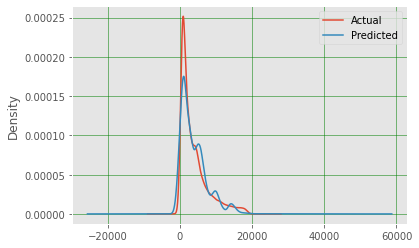

In [37]:
df1 = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_pred_test.ravel()})
df1.plot(kind='kde')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

**Here we see that the prediction is not that accurate, so we will now perform further analysis to make our model more accurate**

### Constructing residual Plot

In [38]:
import statsmodels.stats.api as sms

predictions = model.predict(X_constant)
residuals = model.resid

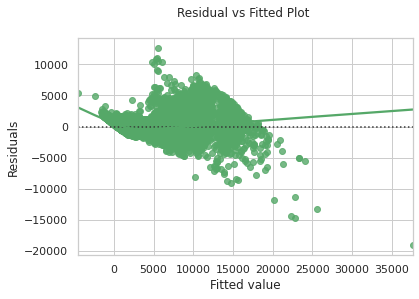

In [39]:
sns.set(style = 'whitegrid')
ax = sns.residplot(predictions, residuals, lowess=True, color = 'g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

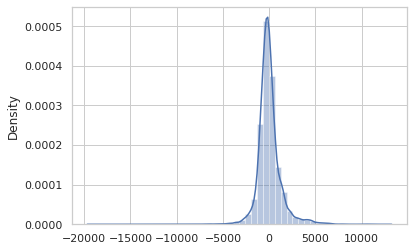

In [40]:
sns.set(style = 'whitegrid')
sns.distplot(residuals)
plt.show()

**If the residual plot is normal then directly compute the R2 value, no need for transformation. If it is not normal then go for transformation. As, here the residual plot is not perfectly normal, so we will go for transformation**

In [41]:
# Splitting the data into log(dependent) and independent variables
X=diamonds.drop('price', 1)
y=diamonds['price']
y=y.transform(lambda X: np.log(X))
    
# Splitting into test and train data (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print('X_train size :',X_train.shape)
print('X_test size :',X_test.shape)
print('y_train size :',y_train.shape)
print('y_test size :',y_test.shape)

X_train size : (37758, 9)
X_test size : (16182, 9)
y_train size : (37758,)
y_test size : (16182,)


In [52]:
# defining a function for regression model

# building and training the model with train data, using sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(f'R^2 score for Train using sklearn: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for Test using sklearn: {lin_reg.score(X_test, y_test)}')
    
# building and training the model with train data, using statsmodels
import statsmodels.api as sm
X_constant = sm.add_constant(X_train)
model = sm.OLS(y_train,X_constant).fit()
model.summary()
print( '\nR^2 for Train using stasmodels:',model.rsquared)
print( 'AdjR^2 for Train using stasmodels :',model.rsquared_adj)
    
# building and training the model with test data, using statsmodels
import statsmodels.api as sm
X_constant = sm.add_constant(X_test)
model = sm.OLS(y_test,X_constant).fit()
model.summary()
print( '\nR^2 for Test using stasmodels :',model.rsquared)
print( 'AdjR^2 for Test using stasmodels :',model.rsquared_adj)
    
# Value of MAE and RMSE
from sklearn import metrics
y_pred_test = model.predict(sm.add_constant(X_test))
y_pred_train = model.predict(sm.add_constant(X_train))
print("\nMean Absolute Error for Train:", metrics.mean_absolute_error(y_pred_train,y_train))
print("Mean Absolute Error for Test:", metrics.mean_absolute_error(y_pred_test,y_test))
print("Root Mean Squared Error for Train:",np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("Root Mean Squared Error for Test:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    
print(model.summary())
#prediction(data=diamonds, target_variable='price', split_size=0.3)

R^2 score for Train using sklearn: 0.9429412683958371
R^2 score for Test using sklearn: 0.9523151748378426

R^2 for Train using stasmodels: 0.9429412683958371
AdjR^2 for Train using stasmodels : 0.9429276642688784

R^2 for Test using stasmodels : 0.9545497536628308
AdjR^2 for Test using stasmodels : 0.9545244598082033

Mean Absolute Error for Train: 0.16213751120764902
Mean Absolute Error for Test: 0.1569476442571425
Root Mean Squared Error for Train: 0.3261495112937905
Root Mean Squared Error for Test: 0.2138739075939379
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 3.774e+04
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        07:37:02   Log-Likelihood:                 1997.

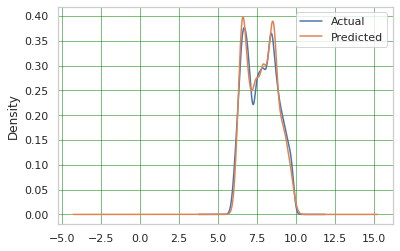

In [50]:
df1 = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_pred_test.ravel()})
df1.plot(kind='kde')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()